# Gather Reddit Data

In [ ]:
#######
# IMPORT PACKAGES
#######

import praw
import pandas as pd

CLIENT_ID = "HBw4uLs8wk6FoQ"
CLIENT_SECRET = "E18V_3uilF7flpmKwHJXw38qQ8g"

NAME = "Rat Sightings Vis"
USERNAME = "crab888"
PASSWORD = "ZYyRHpjQWm6x27A"

reddit = praw.Reddit(user_agent="Comment Extraction (by /u/USERNAME)",
                     client_id=CLIENT_ID, client_secret=CLIENT_SECRET,
                     username=USERNAME, password=PASSWORD)


# Acessing the reddit api

sub = ['all']  # make a list of subreddits you want to scrape the data from

for s in sub:
    subreddit = reddit.subreddit(s)   # Chosing the subreddit


########################################
#   CREATING DICTIONARY TO STORE THE DATA WHICH WILL BE CONVERTED TO A DATAFRAME
########################################

#   NOTE: ALL THE POST DATA AND COMMENT DATA WILL BE SAVED IN TWO DIFFERENT
#   DATASETS AND LATER CAN BE MAPPED USING IDS OF POSTS/COMMENTS AS WE WILL 
#   BE CAPTURING ALL IDS THAT COME IN OUR WAY

# SCRAPING CAN BE DONE VIA VARIOUS STRATEGIES {HOT,TOP,etc} we will go with keyword strategy i.e using search a keyword
    query = ['NYC rats']

    for item in query:
        post_dict = {
            "title" : [],
            "score" : [],
            "id" : [],
            "url" : [],
            "comms_num": [],
            "created" : [],
            "body" : []
        }
        comments_dict = {
            "post_id" : [],
            "comment_id" : [],
            "comment_score" : [],
            "comment_parent_id" : [],
            "comment_body" : [],
            "comment_link_id" : [],
            "created" : []
        }
        
#         search_res = subreddit.search(query,sort = "top",limit = None)
#         print(str(len(list(search_res))) + "results")
        
        for submission in subreddit.search(query,sort = "top",limit = None):
            post_dict["title"].append(submission.title)
            post_dict["score"].append(submission.score)
            post_dict["id"].append(submission.id)
            post_dict["url"].append(submission.url)
            post_dict["comms_num"].append(submission.num_comments)
            post_dict["created"].append(submission.created_utc)
            post_dict["body"].append(submission.selftext)
            
            print(submission.title)
            
            ##### Acessing comments on the post
            submission.comments.replace_more(limit = None)
            for comment in submission.comments.list():
                comments_dict["post_id"].append(submission.id)
                comments_dict["comment_id"].append(comment.id)
                comments_dict["comment_score"].append(comment.score)
                comments_dict["comment_parent_id"].append(comment.parent_id)
                comments_dict["comment_body"].append(comment.body)
                comments_dict["comment_link_id"].append(comment.link_id)
                comments_dict["created"].append(comment.created_utc)
                    
                if(len(comments_dict["post_id"]) % 500 == 0):
                    print(str(len(comments_dict["post_id"]))  + "comments... saving dict", end="")
                    print("checking consistency")
                    for item in comments_dict:
                        print(item)
                        print(len(comments_dict[item]))
                    post_comments = pd.DataFrame(comments_dict)
                    post_comments.to_csv(s+"_comments_"+ item +"subreddit.csv")
                    print("... saved")
                
            if(len(post_dict["id"]) % 50 == 0):
                print("checking consistency")
                for item in post_dict:
                    print(item)
                    print(len(post_dict[item]))
                print(str(len(post_dict["id"]))  + "posts... saving dict", end="")
                post_data = pd.DataFrame(post_dict)
                post_data.to_csv(s+"_"+ item +"subreddit.csv")
                print("... saved")
        

In [ ]:
post_data = pd.DataFrame(post_dict)
post_data.to_csv("rat_posts.csv")
post_comments = pd.DataFrame(comments_dict)
post_comments.to_csv("rat_comments.csv")

# Clean the data

In [149]:
import pandas as pd

In [150]:
rat_posts = pd.read_csv("rat_posts_cleaned_3.csv")
rat_comments_full = pd.read_csv("rat_comments.csv")

In [151]:
uniques = rat_posts.id.unique()

def f(post):
    return post in uniques

mask = rat_comments_full["post_id"].apply(f)
print(mask)
comments = rat_comments_full[mask]

0        True
1        True
2        True
3        True
4        True
         ... 
23179    True
23180    True
23181    True
23182    True
23183    True
Name: post_id, Length: 23184, dtype: bool


In [152]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(comments.shape)

(11790, 8)


In [153]:
comments.to_csv("comments_cleaned.csv")

In [154]:
def f1(post):
    
    res = rat_posts.loc[post["post_id"] == rat_posts["id"]]
    title = res["title"].values[0].lower()
    has_rat_in_title = (title.find("rat ") >= 0 
                            or title.find(" rat") >= 0
                            or title.find("rats") >= 0)
    if(has_rat_in_title):
        return True
    
    print(res["title"])
    comment_body = post["comment_body"].lower()
    has_rat_in_comment = (comment_body.find("rat ") >= 0 
                        or comment_body.find(" rat") >= 0
                        or comment_body.find("rats") >= 0)
    return has_rat_in_comment


In [155]:
mask = comments.apply(f1, axis=1)

1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over pric

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is a shit infested, over price ghetto
Name: title, dtype: object
1    NYC is

Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York

Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York

Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York

Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York

Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York

Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York

Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York City is a Shithole
Name: title, dtype: object
2    New York

16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16    This email was sent to us by our hoa president...
Name: title, dtype: object
16  

21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21  

Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name: title, dtype: object
21    Whats your NYC neighborhood's Dirty Little Sec...
Name

Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name: title, dtype: object
22    A bit of perspective on MetroTransit and the l...
Name

Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name: title, dtype: object
23    I hope one mayoral candidate brings up the fac...
Name

Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: title, dtype: object
24    Fuck New York & Everything In It
Name: titl

Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: object
34    NYC Slumlords strike again!
Name: title, dtype: obje

Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Quality of life improvements in NYC
Name: title, dtype: object
37    Q

52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU like eight times in quick succession.
Name: title, dtype: object
52    TIFU l

58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58    Recently moved to UK and discovered you have r...
Name: title, dtype: object
58  

In [156]:
mask

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
30        True
31        True
32        True
33        True
34        True
35        True
36        True
37        True
38        True
39        True
40        True
41        True
42        True
43        True
44        True
45        True
46        True
47        True
48        True
49        True
50        True
51        True
52        True
53        True
54        True
55        True
56        True
57        True
58        True
59        True
60        True
61        True
62        True
63        True
64        True
65        True
66        

In [157]:
comments_2 = comments[mask]

In [158]:
comments_2.shape

(5676, 8)

In [159]:
comments_2.to_csv("cleaned_comments.csv")

# Sentiment analysis

In [160]:
import pandas as pd
comments = pd.read_csv("cleaned_comments.csv")

In [161]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

## VADER

In [163]:
def sentiment_analysis(row):
    paragraph = row["comment_body"]
    tokenized = tokenize.sent_tokenize(paragraph)
    sentiment_dict = {"compound" : 0, "pos": 0, "neu": 0, "neg": 0}
    for t in tokenized:
        ss = sid.polarity_scores(t)
        for k in sorted(ss):
            sentiment_dict[k] += ss[k]
    for sentiment in sentiment_dict:
        sentiment_dict[sentiment] /= len(tokenized)
    return sentiment_dict

comments['sentiment'] = comments.apply(sentiment_analysis, axis=1)
               
comments["compound"] = comments.apply(lambda row: row["sentiment"].get("compound"), axis=1)
comments["pos"] = comments.apply(lambda row: row["sentiment"].get("pos"), axis=1)
comments["neg"] = comments.apply(lambda row: row["sentiment"].get("neg"), axis=1)
comments["neu"] = comments.apply(lambda row: row["sentiment"].get("neu"), axis=1)

In [164]:
comments.to_csv("comments_sentiment.csv")

# Keyword extraction

special thanks to https://github.com/andybywire/nlp-text-analysis/blob/master/text-analytics.ipynb

In [165]:
dataset = comments.copy()

dataset

Unnamed: 0  Unnamed: 0.1 post_id comment_id  comment_score  \
0              0             0  bx2nfy    eq31psp           1391   
1              1             1  bx2nfy    eq317yu           1717   
2              2             2  bx2nfy    eq2yn1r           1643   
3              3             3  bx2nfy    eq2q641           2562   
4              4             4  bx2nfy    eq371i7            794   
5              5             5  bx2nfy    eq2qo39            217   
6              6             6  bx2nfy    eq2yjb4            101   
7              7             7  bx2nfy    eq2pyli            272   
8              8             8  bx2nfy    eq38pv4            141   
9              9             9  bx2nfy    eq3bcw6            113   
10            10            10  bx2nfy    eq3aqxi             30   
11            11            11  bx2nfy    eq33m5z            289   
12            12            12  bx2nfy    eq38i6t             52   
13            13            13  bx2nfy    eq3d0ch             17   
14            14            14  bx2nfy    eq3bvoh             45   
15            15            15  bx2nfy    eq3kepw             16   
16            16            16  bx2nfy    eq38qhd             24   
17            17            17  bx2nfy    eq3itw3             10   
18            18            18  bx2nfy    eq303rk             61   
19            19            19  bx2nfy    eq3gwnc              6   
20            20            20  bx2nfy    eq30i3t              7   
21            21            21  bx2nfy    eq37vcx              6   
22            22            22  bx2nfy    eq39r8t             13   
23            23            23  bx2nfy    eq47ksb              4   
24            24            24  bx2nfy    eq36jwi             15   
25            25            25  bx2nfy    eq36iax             27   
26            26            26  bx2nfy    eq38000             17   
27            27            27  bx2nfy    eq2qc41              3   
28            28            28  bx2nfy    eq37da0              3   
29            29            29  bx2nfy    eq37krl              3   
30            30            30  bx2nfy    eq3hk3f              3   
31            31            31  bx2nfy    eq4yqj4              3   
32            32            32  bx2nfy    eq47t3m              5   
33            33            33  bx2nfy    eq2xcp8             17   
34            34            34  bx2nfy    eq39g48              2   
35            35            35  bx2nfy    eq3cm0u              2   
36            36            36  bx2nfy    eq3d08i              2   
37            37            37  bx2nfy    eq3fdgm              2   
38            38            38  bx2nfy    eq3foim              2   
39            39            39  bx2nfy    eq3fy7j              2   
40            40            40  bx2nfy    eq3hnex              2   
41            41            41  bx2nfy    eq3iriv              2   
42            42            42  bx2nfy    eq3j67a              2   
43            43            43  bx2nfy    eq3nscm              2   
44            44            44  bx2nfy    eq3o6rx              2   
45            45            45  bx2nfy    eq3pk9s              2   
46            46            46  bx2nfy    eq3qti8              2   
47            47            47  bx2nfy    eq3vlqk              2   
48            48            48  bx2nfy    eq3wzfd              2   
49            49            49  bx2nfy    eq47oop              2   
50            50            50  bx2nfy    eq497iy              2   
51            51            51  bx2nfy    eq4a0wf              2   
52            52            52  bx2nfy    eq4dnzu              2   
53            53            53  bx2nfy    eq4lvw8              2   
54            54            54  bx2nfy    eq4nytx              2   
55            55            55  bx2nfy    eq4sotw              2   
56            56            56  bx2nfy    eq4tc5e              2   
57            57            57  bx2nfy    eq4uxk8             

In [166]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/crabbage/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/crabbage/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [167]:
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [168]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
custom_stopwords = ["would", "www", "http","https", "com", "get", "youtube", "wikipedia", "org", "en", "reddit", "np"]
stop_words = stop_words.union(custom_stopwords)

print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'com', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'en', 'few', 'for', 'from', 'further', 'get', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'http', 'https', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'np', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'org', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 'reddit', 's', 'same', 'shan', "shan't", 'she', "she's", 

In [192]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
dataset['word_count'] = dataset["comment_body"].apply(lambda x: len(str(x).split(" ")))
dataset['tokenized_text'] = dataset["comment_body"]
ds_count = len(dataset.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(dataset["comment_body"][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    dataset["tokenized_text"].iloc[i] = text
    
    corpus.append(text)

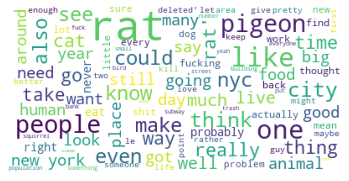

In [171]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

file_prefix = "rats_keywords_"

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig(file_prefix + "wordcloud.png", dpi=900)

In [172]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['live',
 'th',
 'street',
 'near',
 'construction',
 'site',
 'average',
 'th street',
 'construction site',
 'thing']

   Keyword  Frequency
0      rat       2529
1     like        714
2      one        548
3   pigeon        534
4   people        495
5      nyc        373
6     city        369
7    think        320
8      new        316
9      cat        310
10    time        303
11    make        300
12   could        283
13     see        282
14    even        278
15    know        262
16     way        243
17      go        239
18   thing        238
19  really        238


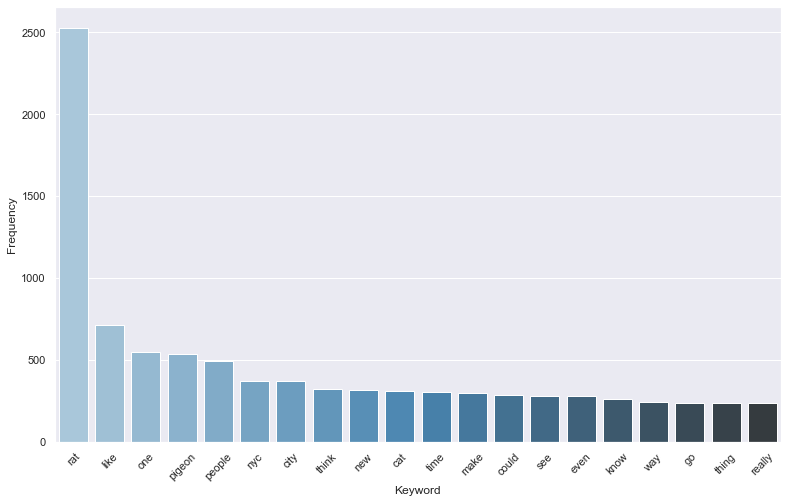

In [173]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

               Bi-gram  Frequency
0             new york        163
1            look like         66
2              rat man         64
3              nyc rat         53
4          rat problem         41
5           pigeon man         41
6             rat king         37
7      master splinter         36
8              rat rat         36
9           rat pigeon         34
10             pet rat         33
11     homeless people         33
12         new yorkers         32
13           feel like         32
14          sound like         32
15      rat population         30
16  forced perspective         28
17             rat big         28
18            year ago         28
19           pizza rat         28


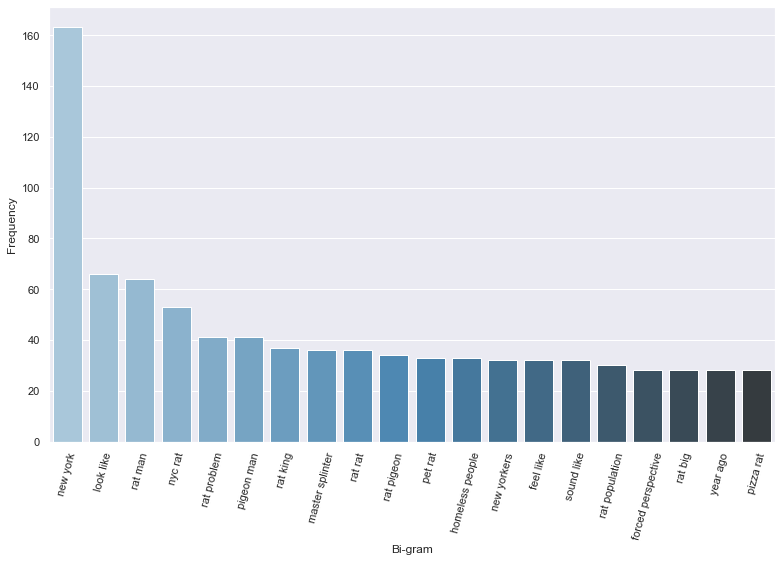

In [174]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
top2_df.to_csv(file_prefix + '_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
h.figure.savefig(file_prefix + "_bi-gram.png", bbox_inches = "tight")

                  Tri-gram  Frequency
0            new york city         27
1      rodent unusual size         13
2             new york rat         11
3           giant rat make         10
4              oh shit rat          9
5            rat make rule          9
6             rat new york          8
7         make feel better          8
8      saying good morning          8
9      rat walking upright          7
10  walking upright saying          7
11     upright saying good          7
12        seen rat walking          7
13      wp content uploads          6
14         upper west side          6
15           live new york          5
16      much closer camera          5
17      unusual size think          5
18        size think exist          5
19             rat rat rat          5


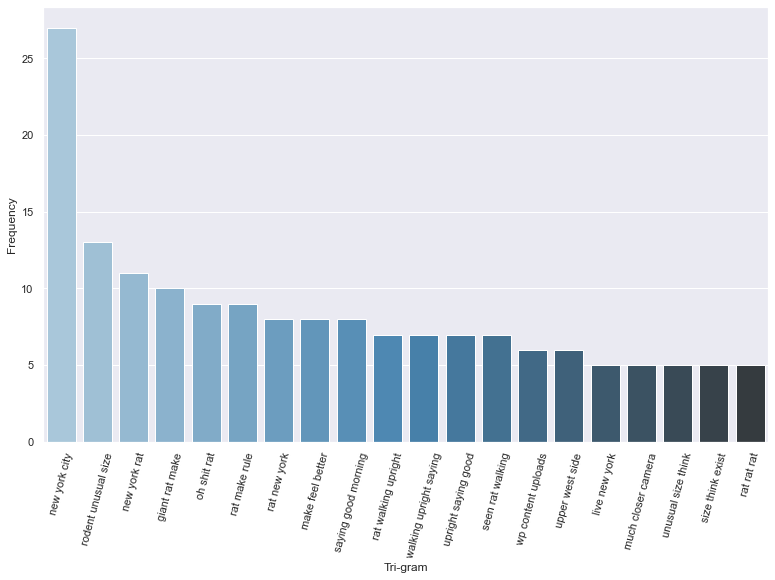

In [175]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)
top3_df.to_csv(file_prefix + '_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
j.figure.savefig(file_prefix + "_tri-gram.png", bbox_inches = "tight")

In [193]:
def pos_sentiment(post):
    return post["compound"] > 0.01

def neg_sentiment(post):
    return post["compound"] < -0.01

def neu_sentiment(post):
    return not (pos_sentiment(post) or neg_sentiment(post))

def final_sentiment(post):
    if(pos_sentiment(post)):
        return "Positive"
    elif(neg_sentiment(post)):
        return "Negative"
    else:
        return "Neutral"

positive_comments = dataset[dataset.apply(pos_sentiment, axis=1)].copy().reset_index()
negative_comments = dataset[dataset.apply(neg_sentiment, axis=1)].copy().reset_index()
neutral_comments = dataset[dataset.apply(neu_sentiment, axis=1)].copy().reset_index()

dataset["sentiment"] = dataset.apply(final_sentiment, axis=1)
dataset.to_csv("comments_with_sentiment_analysis.csv")

print(positive_comments)

      index  Unnamed: 0  Unnamed: 0.1 post_id comment_id  comment_score  \
0        13          13            13  bx2nfy    eq3d0ch             17   
1        16          16            16  bx2nfy    eq38qhd             24   
2        18          18            18  bx2nfy    eq303rk             61   
3        26          26            26  bx2nfy    eq38000             17   
4        28          28            28  bx2nfy    eq37da0              3   
5        38          38            38  bx2nfy    eq3foim              2   
6        39          39            39  bx2nfy    eq3fy7j              2   
7        41          41            41  bx2nfy    eq3iriv              2   
8        42          42            42  bx2nfy    eq3j67a              2   
9        50          50            50  bx2nfy    eq497iy              2   
10       51          51            51  bx2nfy    eq4a0wf              2   
11       56          56            56  bx2nfy    eq4tc5e              2   
12       58          58  

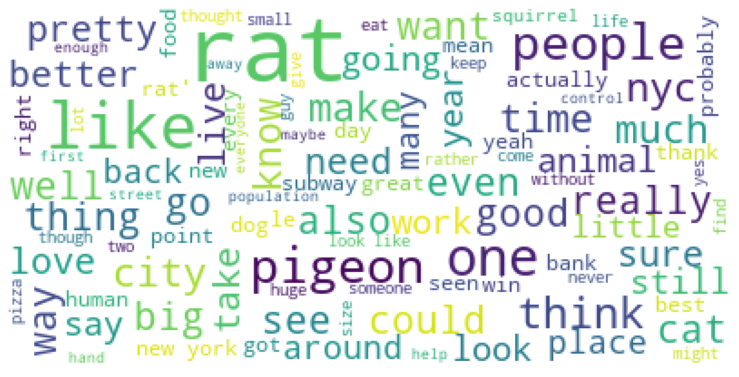

In [177]:
# Pre-process dataset to get a cleaned and normalised text corpus
pos_corpus = []
positive_comments['word_count'] = positive_comments["comment_body"].apply(lambda x: len(str(x).split(" ")))
pos_ds_count = len(positive_comments.word_count)
for i in range(0, pos_ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(positive_comments["comment_body"][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    pos_corpus.append(text)
    
    
pos_file_prefix = "positive_rats_keywords_"

pos_wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(pos_corpus))
print(pos_wordcloud)
fig2 = plt.figure(1)
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()
fig2.savefig(pos_file_prefix + "wordcloud.png", dpi=900)

X=cv.fit_transform(pos_corpus)

   Keyword  Frequency
0      rat       1024
1     like        474
2      one        256
3   pigeon        240
4   people        220
5     city        156
6    think        153
7     time        152
8      nyc        148
9     good        146
10    make        141
11     cat        138
12     new        136
13  really        124
14    well        123
15    much        120
16    look        118
17     see        118
18    even        118
19  pretty        114


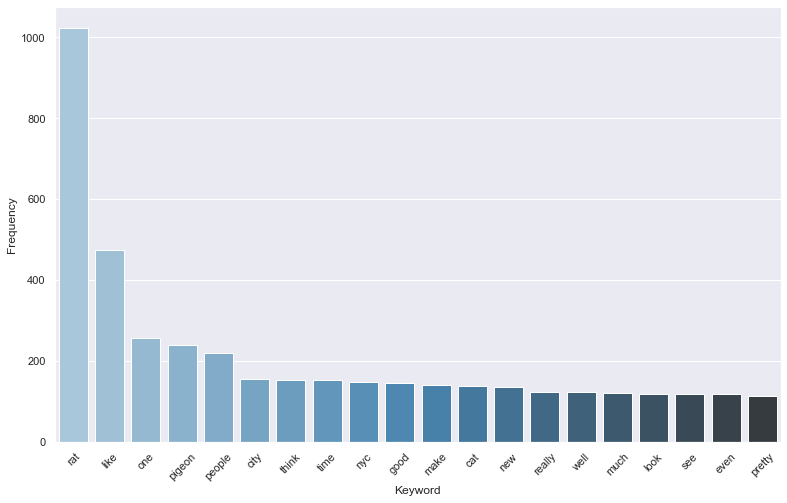

In [178]:
# Convert most freq words to dataframe for plotting bar plot, save as CSV
pos_top_words = get_top_n_words(pos_corpus, n=20)
pos_top_df = pandas.DataFrame(pos_top_words)
pos_top_df.columns=["Keyword", "Frequency"]
print(pos_top_df)
pos_top_df.to_csv(file_prefix + '_top_positive_words.csv')

# Barplot of most freq words
pos_g = sns.barplot(x="Keyword", y="Frequency", data=pos_top_df, palette="Blues_d")
pos_g.set_xticklabels(pos_g.get_xticklabels(), rotation=45)
pos_g.figure.savefig(file_prefix + "_positive_keyword.png", bbox_inches = "tight")

            Keyword  Frequency
0          new york         63
1         look like         54
2           rat man         41
3        pigeon man         27
4        sound like         25
5           pet rat         23
6         feel like         22
7          like rat         22
8           nyc rat         20
9       pretty much         20
10         rat king         17
11   rat population         16
12          rat rat         15
13        york city         14
14       rat pigeon         14
15        think rat         14
16         year ago         13
17      new yorkers         13
18      pretty sure         13
19  homeless people         13


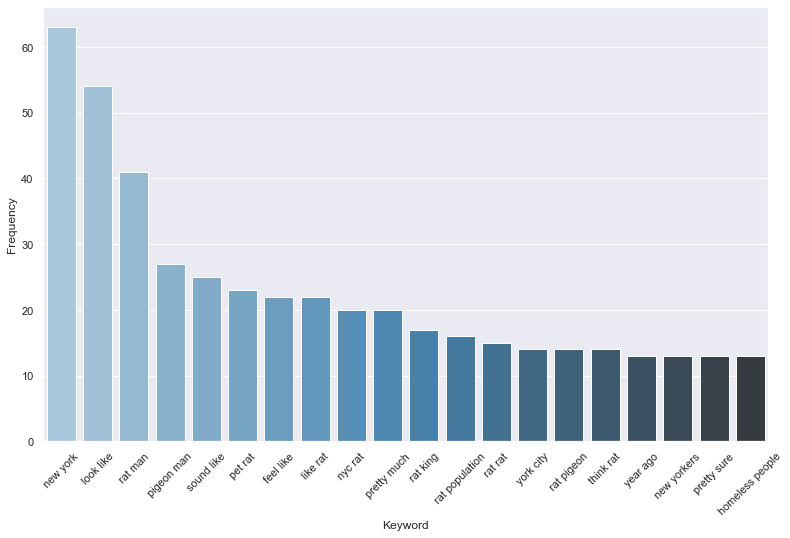

In [179]:
pos_top2_words = get_top_n2_words(pos_corpus, n=20)
pos_top2_df = pandas.DataFrame(pos_top2_words)
pos_top2_df.columns=["Keyword", "Frequency"]
print(pos_top2_df)
pos_top2_df.to_csv(file_prefix + '_top2_positive_words.csv')

# Barplot of most freq words
pos2_g = sns.barplot(x="Keyword", y="Frequency", data=pos_top2_df, palette="Blues_d")
pos2_g.set_xticklabels(pos2_g.get_xticklabels(), rotation=45)
pos2_g.figure.savefig(file_prefix + "_positive2_keyword.png", bbox_inches = "tight")

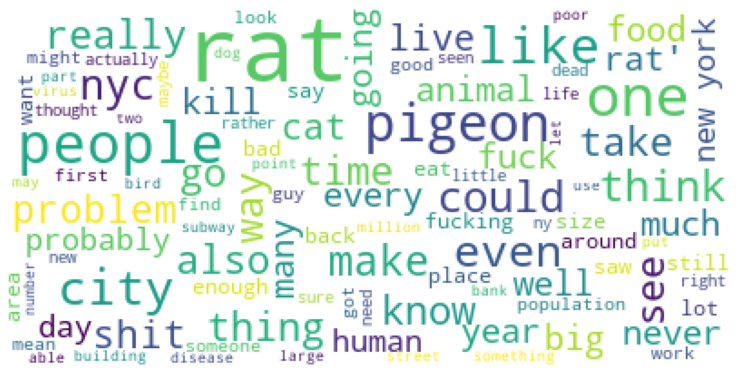

In [180]:
# Pre-process dataset to get a cleaned and normalised text corpus
neg_corpus = []
negative_comments['word_count'] = negative_comments["comment_body"].apply(lambda x: len(str(x).split(" ")))
neg_ds_count = len(negative_comments.word_count)
for i in range(0, neg_ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(negative_comments["comment_body"][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    neg_corpus.append(text)
    
    
neg_file_prefix = "negative_rats_keywords_"

neg_wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(neg_corpus))
print(neg_wordcloud)
fig3 = plt.figure(1)
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show()
fig3.savefig(neg_file_prefix + "wordcloud.png", dpi=900)

X=cv.fit_transform(neg_corpus)

    Keyword  Frequency
0       rat        974
1       one        226
2    people        212
3    pigeon        205
4      like        198
5      city        174
6       nyc        147
7      shit        138
8   problem        133
9     could        132
10     even        131
11    think        122
12     make        116
13     time        112
14     know        107
15    thing        104
16      cat        101
17      see        101
18      new        100
19       go        100


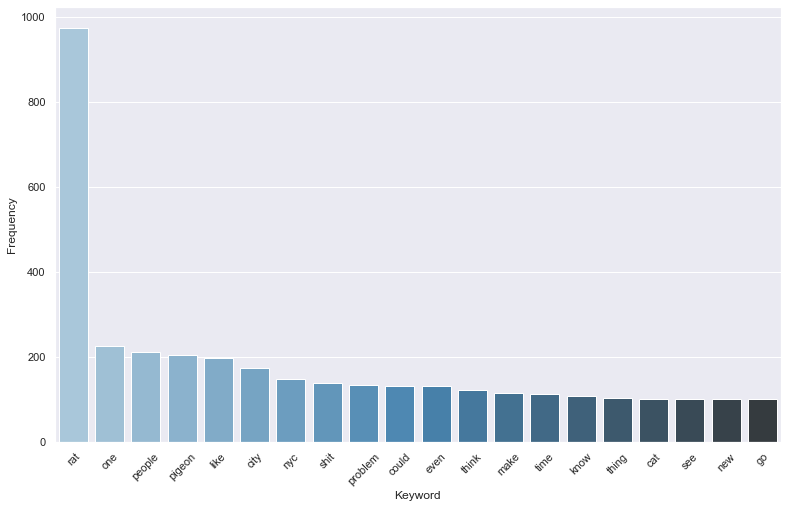

In [181]:
# Convert most freq words to dataframe for plotting bar plot, save as CSV
neg_top_words = get_top_n_words(neg_corpus, n=20)
neg_top_df = pandas.DataFrame(neg_top_words)
neg_top_df.columns=["Keyword", "Frequency"]
print(neg_top_df)
neg_top_df.to_csv(file_prefix + '_top_negative_words.csv')

# Barplot of most freq words
neg_g = sns.barplot(x="Keyword", y="Frequency", data=neg_top_df, palette="Blues_d")
neg_g.set_xticklabels(neg_g.get_xticklabels(), rotation=45)
neg_g.figure.savefig(file_prefix + "_negative_keyword.png", bbox_inches = "tight")

               Keyword  Frequency
0             new york         60
1          rat problem         30
2              nyc rat         24
3   forced perspective         21
4              rat man         20
5             shit rat         15
6              see rat         15
7              oh shit         14
8            rat could         14
9           pigeon man         13
10           look like         12
11             rat rat         12
12           think rat         12
13         new yorkers         11
14            dead rat         11
15     homeless people         11
16           feral cat         11
17          rat pigeon         11
18            rat size         10
19             rat big         10


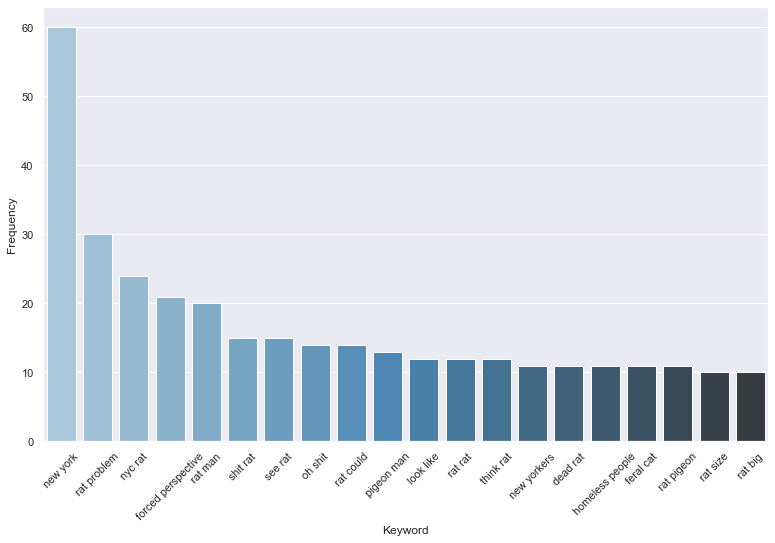

In [182]:
neg_top2_words = get_top_n2_words(neg_corpus, n=20)
neg_top2_df = pandas.DataFrame(neg_top2_words)
neg_top2_df.columns=["Keyword", "Frequency"]
print(neg_top2_df)
neg_top2_df.to_csv(file_prefix + '_top2_negative_words.csv')

# Barplot of most freq words
neg2_g = sns.barplot(x="Keyword", y="Frequency", data=neg_top2_df, palette="Blues_d")
neg2_g.set_xticklabels(neg2_g.get_xticklabels(), rotation=45)
neg2_g.figure.savefig(file_prefix + "_negative2_keyword.png", bbox_inches = "tight")

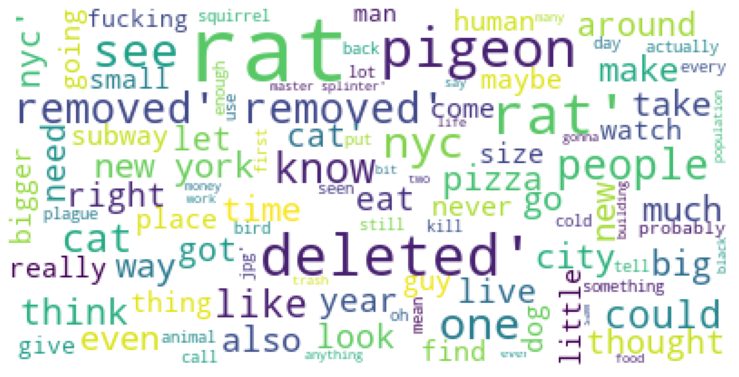

In [183]:
# Pre-process dataset to get a cleaned and normalised text corpus
neu_corpus = []
neutral_comments['word_count'] = neutral_comments["comment_body"].apply(lambda x: len(str(x).split(" ")))
neu_ds_count = len(neutral_comments.word_count)
for i in range(0, neu_ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(neutral_comments["comment_body"][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    neu_corpus.append(text)
    
    
neu_file_prefix = "neutral_rats_keywords_"

neu_wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(neu_corpus))
print(neu_wordcloud)
fig3 = plt.figure(1)
plt.imshow(neu_wordcloud)
plt.axis('off')
plt.show()
fig3.savefig(neu_file_prefix + "wordcloud.png", dpi=900)

X=cv.fit_transform(neu_corpus)

     Keyword  Frequency
0        rat        531
1    deleted         92
2    removed         92
3     pigeon         89
4        new         80
5        nyc         78
6        cat         71
7        one         66
8        see         63
9     people         63
10  splinter         47
11      know         47
12     think         45
13      make         43
14     could         42
15      like         42
16     pizza         41
17      york         41
18       big         39
19      time         39


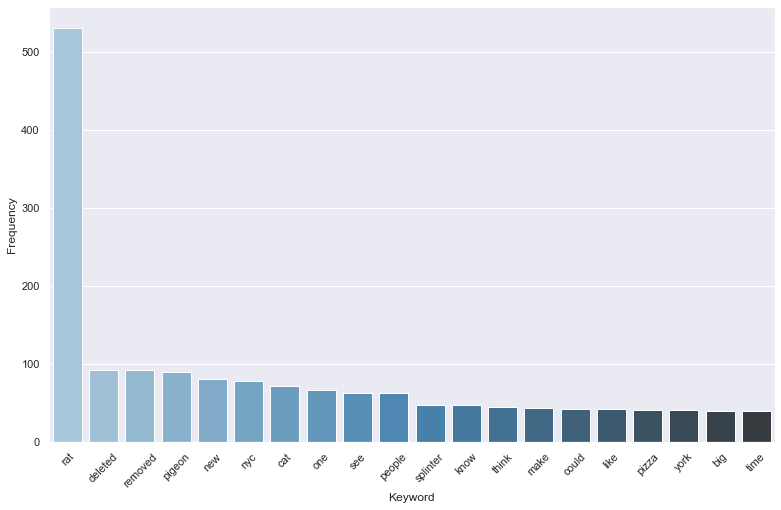

In [194]:
# Convert most freq words to dataframe for plotting bar plot, save as CSV
neu_top_words = get_top_n_words(neu_corpus, n=20)
neu_top_df = pandas.DataFrame(neu_top_words)
neu_top_df.columns=["Keyword", "Frequency"]
print(neu_top_df)
neu_top_df.to_csv(file_prefix + '_top1_neutral_words.csv')

# Barplot of most freq words
neu_g = sns.barplot(x="Keyword", y="Frequency", data=neu_top_df, palette="Blues_d")
neu_g.set_xticklabels(neu_g.get_xticklabels(), rotation=45)
neu_g.figure.savefig(file_prefix + "_neutral_keyword.png", bbox_inches = "tight")

              Keyword  Frequency
0            new york         40
1     master splinter         27
2            rat king         12
3           giant rat         12
4           make rule         12
5           pizza rat         12
6            rat make         10
7        unusual size         10
8      rodent unusual          9
9             nyc rat          9
10            rat rat          9
11            rat nyc          9
12    homeless people          9
13         rat pigeon          9
14        new yorkers          8
15            see rat          8
16  construction site          7
17            rat big          7
18         never seen          7
19           rat also          6


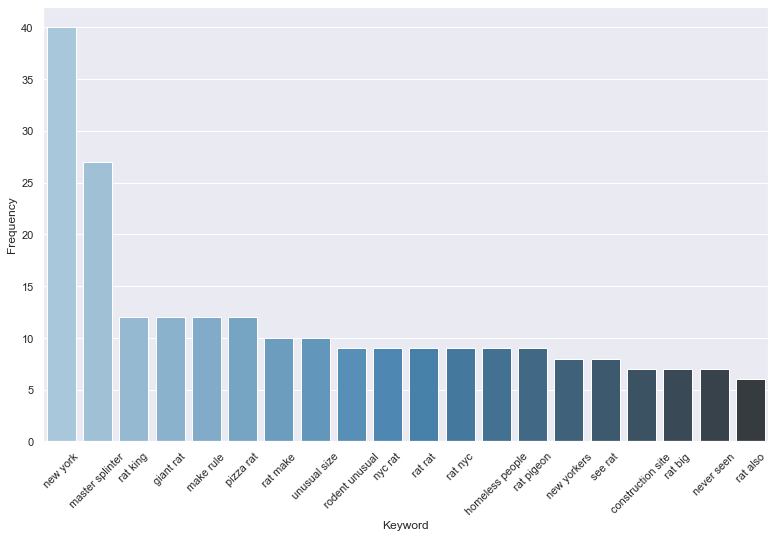

In [185]:
# Convert most freq words to dataframe for plotting bar plot, save as CSV
neu_top_words = get_top_n2_words(neu_corpus, n=20)
neu_top_df = pandas.DataFrame(neu_top_words)
neu_top_df.columns=["Keyword", "Frequency"]
print(neu_top_df)
neu_top_df.to_csv(file_prefix + '_top_neutral_words.csv')

# Barplot of most freq words
neu_g = sns.barplot(x="Keyword", y="Frequency", data=neu_top_df, palette="Blues_d")
neu_g.set_xticklabels(neu_g.get_xticklabels(), rotation=45)
neu_g.figure.savefig(file_prefix + "_neutral_keyword.png", bbox_inches = "tight")